In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("H2HBABBA1504.csv")

In [3]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200689451,PORK foundation,24-09-19 0:00,2019,1929848942,09-09-19,20190908,20190909,20190924,USD,RV,1,NaN,144839.95,20190909,NAA8,1.929849e+09,0
1,U001,200726979,BJ'S corporation,NaN,2020,1930813533,22-04-20,20200422,20200422,20200507,USD,RV,1,NaN,132.72,20200422,NAA8,1.930814e+09,1
2,U001,200769623,WAL-MAR llc,28-06-19 0:00,2019,1929509741,18-06-19,20190618,20190618,20190703,USD,RV,1,NaN,1425.56,20190618,NAH4,1.929510e+09,0
3,U001,200769623,WAL-MAR llc,29-05-19 0:00,2019,1929301403,12-05-19,20190511,20190512,20190527,USD,RV,1,NaN,1569.62,20190512,NAH4,1.929301e+09,0
4,U001,200739534,OK systems,NaN,2020,1930782511,13-04-20,20200413,20200413,20200428,USD,RV,1,NaN,25051.77,20200413,NAA8,1.930783e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200707822,PUBLI llc,18-03-19 0:00,2019,1928885156,01-03-19,20190301,20190301,20190316,USD,RV,1,NaN,53476.11,20190301,NAA8,1.928885e+09,0
49996,U001,200744019,TARG associates,26-12-19 0:00,2019,1930265137,12-12-19,20191211,20191212,20191227,USD,RV,1,NaN,10110.18,20191212,NAA8,1.930265e+09,0
49997,U001,200707822,PUBLI foundation,05-07-19 0:00,2019,1929518502,19-06-19,20190620,20190619,20190704,USD,RV,1,NaN,22694.38,20190619,NAA8,1.929519e+09,0
49998,U001,200707822,PUBLI systems,NaN,2020,1930779612,12-04-20,20200412,20200412,20200427,USD,RV,1,NaN,53363.87,20200412,NAA8,1.930780e+09,1


In [4]:
 ##spliting data for na and notna values in diffrent data set
test= df[df["clear_date"].isna()];
train=df[df["clear_date"].notnull()]
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200689451,PORK foundation,24-09-19 0:00,2019,1929848942,09-09-19,20190908,20190909,20190924,USD,RV,1,NaN,144839.95,20190909,NAA8,1.929849e+09,0
2,U001,200769623,WAL-MAR llc,28-06-19 0:00,2019,1929509741,18-06-19,20190618,20190618,20190703,USD,RV,1,NaN,1425.56,20190618,NAH4,1.929510e+09,0
3,U001,200769623,WAL-MAR llc,29-05-19 0:00,2019,1929301403,12-05-19,20190511,20190512,20190527,USD,RV,1,NaN,1569.62,20190512,NAH4,1.929301e+09,0
5,CA02,140104409,LOB systems,24-01-20 0:00,2020,2960605300,03-01-20,20200103,20200103,20200120,CAD,RV,1,NaN,4536.00,20200110,CA10,2.960605e+09,0
6,U001,200744019,TARG foundation,29-01-20 0:00,2020,1930392250,13-01-20,20200113,20200113,20200128,USD,RV,1,NaN,15540.18,20200113,NAA8,1.930392e+09,0


In [5]:
train.shape

(40000, 19)

# Milestone 1 

In [6]:
train.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [7]:
 ##droping "area_business" because it has all null values which is not valueable and "Document_creat1" for duplicate exist and
 ## "posting_id" has same values with zero variance 
train=train.drop(labels="area_business",axis=1)
train=train.drop(labels="document_create_date.1",axis=1)
train=train.drop(labels="posting_id",axis=1)

In [8]:
train.duplicated().sum()

885

# Basic pre-processing

In [9]:
##Droping dulicates 
train=train.drop_duplicates(keep="first")

In [10]:
train.isna().sum()

business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
invoice_currency        0
document type           0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
invoice_id              4
isOpen                  0
dtype: int64

In [11]:
 ##Deleteing null values of "invoice_id" (just 4 ) 
train=train[train.invoice_id.isnull()==False]

In [12]:
train.isna().sum()

business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
invoice_currency        0
document type           0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
invoice_id              0
isOpen                  0
dtype: int64

In [13]:
 ##Changing "clear_date" and "due_in_date" to datetime for making "target var"
train["clear_date"]= train["clear_date"].apply(pd.to_datetime)
train["due_in_date"] = pd.to_datetime(train["due_in_date"], format='%Y%m%d')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39111 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39111 non-null  object        
 1   cust_number           39111 non-null  object        
 2   name_customer         39111 non-null  object        
 3   clear_date            39111 non-null  datetime64[ns]
 4   buisness_year         39111 non-null  int64         
 5   doc_id                39111 non-null  int64         
 6   posting_date          39111 non-null  object        
 7   document_create_date  39111 non-null  int64         
 8   due_in_date           39111 non-null  datetime64[ns]
 9   invoice_currency      39111 non-null  object        
 10  document type         39111 non-null  object        
 11  total_open_amount     39111 non-null  float64       
 12  baseline_create_date  39111 non-null  int64         
 13  cust_payment_ter

# Target value creating

In [15]:
 ##Creating "target var" 
train["delay"]=(train["clear_date"]-train["due_in_date"])

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39111 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   business_code         39111 non-null  object         
 1   cust_number           39111 non-null  object         
 2   name_customer         39111 non-null  object         
 3   clear_date            39111 non-null  datetime64[ns] 
 4   buisness_year         39111 non-null  int64          
 5   doc_id                39111 non-null  int64          
 6   posting_date          39111 non-null  object         
 7   document_create_date  39111 non-null  int64          
 8   due_in_date           39111 non-null  datetime64[ns] 
 9   invoice_currency      39111 non-null  object         
 10  document type         39111 non-null  object         
 11  total_open_amount     39111 non-null  float64        
 12  baseline_create_date  39111 non-null  int64          
 13  c

In [17]:
train["delay"]=train['delay'].dt.days
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39111 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39111 non-null  object        
 1   cust_number           39111 non-null  object        
 2   name_customer         39111 non-null  object        
 3   clear_date            39111 non-null  datetime64[ns]
 4   buisness_year         39111 non-null  int64         
 5   doc_id                39111 non-null  int64         
 6   posting_date          39111 non-null  object        
 7   document_create_date  39111 non-null  int64         
 8   due_in_date           39111 non-null  datetime64[ns]
 9   invoice_currency      39111 non-null  object        
 10  document type         39111 non-null  object        
 11  total_open_amount     39111 non-null  float64       
 12  baseline_create_date  39111 non-null  int64         
 13  cust_payment_ter

In [18]:
  ##Delete document-type and  isOpen because all the values has zero variance (constant)
train=train.drop(labels="document type",axis=1)
train=train.drop(labels="isOpen",axis=1)

In [19]:
 ##sorting data by "Posting" time  
train=train.sort_values(by=['posting_date'])

In [20]:
 ##X-contains data without delay values
 ##Y-contains data of only delay values
X = train.drop("delay",axis=1)
y=train['delay']

# Spliting train and validation dataset

In [21]:
 ##spliting the data in "train" & "validation" with 70%-30% for 30%data to fed "y" sections.
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)


# Exploratory data analysis(EDA)

<AxesSubplot:xlabel='delay', ylabel='Density'>

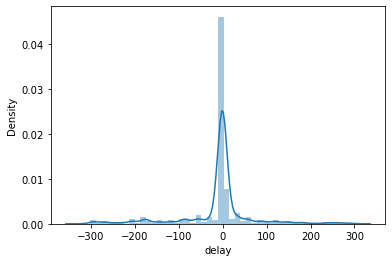

In [22]:
 ##This is pretty Symmentric that's mean alreay normalized
sns.distplot(y_train)

# Data visulization with ploting

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

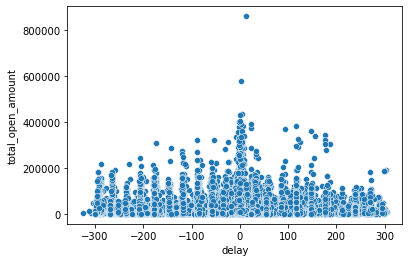

In [23]:
  ##No direct relationship 
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")


In [24]:
temp=X_train.merge(y_train,on = X_train.index)

<AxesSubplot:xlabel='invoice_currency', ylabel='delay'>

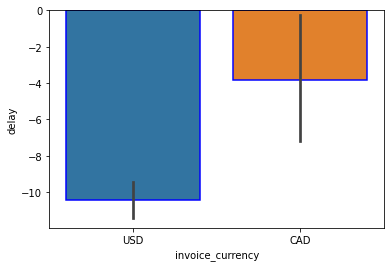

In [25]:
sns.barplot(x="invoice_currency", y="delay",data=temp,linewidth=1.5, edgecolor="blue")

In [26]:
 ##form above figure we can find out that USD currency has more delay

<AxesSubplot:xlabel='business_code', ylabel='delay'>

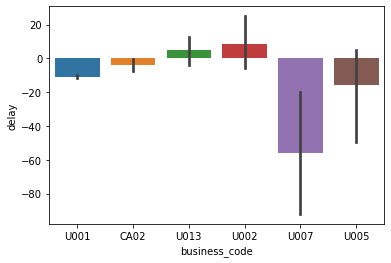

In [27]:
sns.barplot (data=temp, x="business_code", y="delay")

In [28]:
##from above figure we abel to know that most delays are from U007,U005,U001 business_code holders

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27377 entries, 2106 to 16923
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27377 non-null  object        
 1   cust_number           27377 non-null  object        
 2   name_customer         27377 non-null  object        
 3   clear_date            27377 non-null  datetime64[ns]
 4   buisness_year         27377 non-null  int64         
 5   doc_id                27377 non-null  int64         
 6   posting_date          27377 non-null  object        
 7   document_create_date  27377 non-null  int64         
 8   due_in_date           27377 non-null  datetime64[ns]
 9   invoice_currency      27377 non-null  object        
 10  total_open_amount     27377 non-null  float64       
 11  baseline_create_date  27377 non-null  int64         
 12  cust_payment_terms    27377 non-null  object        
 13  invoice_id   

# Milestone 2

# Feature Engineering

In [30]:
 ##making LabelEncoding object
invoice_enc=LabelEncoder()

In [31]:
 ##fit label obj in train set and transform
invoice_enc.fit(X_train['invoice_currency'])

LabelEncoder()

In [32]:
X_train['invoice_enc']=invoice_enc.transform(X_train["invoice_currency"])

In [33]:
  ##fit label encodin in validation set and transform
X_val['invoice_enc']=invoice_enc.transform(X_val["invoice_currency"])

In [34]:
  ##drop "invoice_currency" column from both set
X_train.drop(['invoice_currency'], axis =1,inplace=True)
X_val.drop(['invoice_currency'], axis =1,inplace=True)

In [35]:
business_enc=LabelEncoder()

In [36]:
  ##fitting and transforming label encoding on "business_code" column training set
business_enc.fit(X_train['business_code'])
X_train['business_enc']=business_enc.transform(X_train["business_code"])

In [37]:
  ##fitting and transforming label encoding on "business_code" column for validation set 
X_val['business_enc']=business_enc.transform(X_val["business_code"])
X_val.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,invoice_enc,business_enc
44833,U001,200769623,WAL-MAR in,2019-05-03,2019,1928842094,22-02-19,20190222,2019-03-09,78282.61,20190222,NAH4,1.928842e+09,1,1
106,U001,200794332,COST associates,2019-11-03,2019,1928829933,22-02-19,20190220,2019-03-09,17286.51,20190222,NAAX,1.928830e+09,1,1
8169,U001,200769623,WAL-MAR trust,2019-05-03,2019,1928841983,22-02-19,20190222,2019-03-09,56605.75,20190222,NAH4,1.928842e+09,1,1
5634,U001,200759878,SA associates,2019-11-03,2019,1928830265,22-02-19,20190220,2019-03-09,34387.23,20190222,NAH4,1.928830e+09,1,1
42306,U001,200792283,SYSCO corporation,2019-11-03,2019,1928838776,22-02-19,20190221,2019-03-09,32224.98,20190222,NAA8,1.928839e+09,1,1


In [38]:
  ##droping the "Business code" after encoding 
X_train.drop(['business_code'], axis =1,inplace=True)
X_val.drop(['business_code'], axis =1,inplace=True)

In [39]:
X_val.head()

,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,invoice_enc,business_enc
44833,200769623,WAL-MAR in,2019-05-03,2019,1928842094,22-02-19,20190222,2019-03-09,78282.61,20190222,NAH4,1.928842e+09,1,1
106,200794332,COST associates,2019-11-03,2019,1928829933,22-02-19,20190220,2019-03-09,17286.51,20190222,NAAX,1.928830e+09,1,1
8169,200769623,WAL-MAR trust,2019-05-03,2019,1928841983,22-02-19,20190222,2019-03-09,56605.75,20190222,NAH4,1.928842e+09,1,1
5634,200759878,SA associates,2019-11-03,2019,1928830265,22-02-19,20190220,2019-03-09,34387.23,20190222,NAH4,1.928830e+09,1,1
42306,200792283,SYSCO corporation,2019-11-03,2019,1928838776,22-02-19,20190221,2019-03-09,32224.98,20190222,NAA8,1.928839e+09,1,1


In [40]:
  ##almost all the values are unique so not much of direct term can be derived
X_train["doc_id"].nunique()

27377

In [41]:
 ##droping 'doc_id' for no use
X_train.drop("doc_id", axis =1,inplace=True)
X_val.drop("doc_id", axis =1,inplace=True)

In [42]:
 ##getting unique values of 'cust_number'
X_train['cust_number'].nunique()

957

In [43]:
  ##deleteing 'cust_number' after encoding
X_train.drop(['cust_number'], axis =1,inplace=True)
X_val.drop(['cust_number'], axis =1,inplace=True)

<AxesSubplot:xlabel='buisness_year', ylabel='delay'>

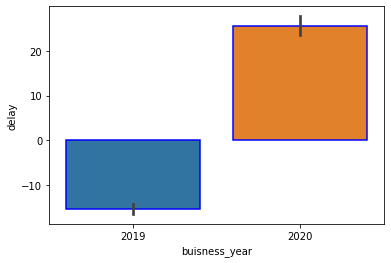

In [44]:
 ##all the delays happen in 2020 business_year
sns.barplot(x="buisness_year", y="delay",data=temp,linewidth=1.5, edgecolor="blue")

In [45]:
business_year_enc=LabelEncoder()

In [46]:
  ##Making encoding "Business_year" 
business_year_enc.fit(X_train['buisness_year'])
X_train['buisness_year_enc']=business_year_enc.transform(X_train["buisness_year"])

In [47]:
 ##fitting encoding to 'business_year'
X_val['buisness_year_enc']=business_year_enc.transform(X_val["buisness_year"])

In [48]:
  ##droping after encoding
X_train.drop(['buisness_year'], axis =1,inplace=True)
X_val.drop(['buisness_year'], axis =1,inplace=True)

In [49]:
X_train.head()

,name_customer,clear_date,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,invoice_enc,business_enc,buisness_year_enc
2106,WAL-MAR us,2019-11-01,01-01-19,20181230,2019-01-16,59830.50,20190101,NAH4,1.928542e+09,1,1,0
46882,KROGER,2019-01-16,01-01-19,20190101,2019-01-16,104109.51,20190101,NAA8,1.928549e+09,1,1,0
8893,WAL-MAR llc,2019-11-01,01-01-19,20190101,2019-01-16,17178.67,20190101,NAH4,1.928549e+09,1,1,0
11006,WAL-MAR in,2019-01-14,01-01-19,20190102,2019-01-16,14488.71,20190101,NAH4,1.928550e+09,1,1,0
18132,C&S WH co,2019-01-16,01-01-19,20190102,2019-01-16,86309.72,20190101,NAC6,1.928549e+09,1,1,0


# Feature Selection

In [50]:
  ##droping all the features that are not need for model
X_train.drop(['name_customer','clear_date',"document_create_date","due_in_date",'cust_payment_terms','invoice_id'], axis =1,inplace=True)

In [51]:
 ##transforming posting date to datetime for using as feature
X_train["posting_date"]= X_train["posting_date"].apply(pd.to_datetime)

In [52]:
X_val["posting_date"]= X_val["posting_date"].apply(pd.to_datetime)

In [53]:
X_val.drop(['name_customer','clear_date',"document_create_date","due_in_date",'cust_payment_terms','invoice_id'], axis =1,inplace=True)

In [54]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11734 entries, 44833 to 17204
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   posting_date          11734 non-null  datetime64[ns]
 1   total_open_amount     11734 non-null  float64       
 2   baseline_create_date  11734 non-null  int64         
 3   invoice_enc           11734 non-null  int32         
 4   business_enc          11734 non-null  int32         
 5   buisness_year_enc     11734 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2)
memory usage: 550.0 KB


In [55]:
  ##extracting 'date','month','year' from "posting" collumn 
X_train['posting_date_enc'] = X_train['posting_date'].dt.day
X_train['posting_month_enc'] = X_train['posting_date'].dt.month
X_train['posting_date_year'] = X_train['posting_date'].dt.year

In [56]:
X_val['posting_date_enc'] = X_val['posting_date'].dt.day
X_val['posting_month_enc'] = X_val['posting_date'].dt.month
X_val['posting_year_enc'] = X_val['posting_date'].dt.year

In [57]:
X_train.drop("posting_date", axis =1,inplace=True)
X_val.drop("posting_date", axis =1,inplace=True)

In [58]:
  ##transforming "baseline_create_date" to datetime format 
X_train["baseline_create_date"] = pd.to_datetime(X_train["baseline_create_date"], format='%Y%m%d')

In [59]:
 ##using "baseline_create_date" with the values of which quarter it belong
X_train['baseline_quater']= pd.to_datetime(X_train['baseline_create_date']).dt.quarter


In [60]:
X_val["baseline_create_date"] = pd.to_datetime(X_val["baseline_create_date"], format='%Y%m%d')
X_val['baseline_quater']= pd.to_datetime(X_val['baseline_create_date']).dt.quarter

In [61]:
X_train.drop("baseline_create_date", axis =1,inplace=True)
X_val.drop("baseline_create_date", axis =1,inplace=True)

# Understanding patterns of data set

<AxesSubplot:>

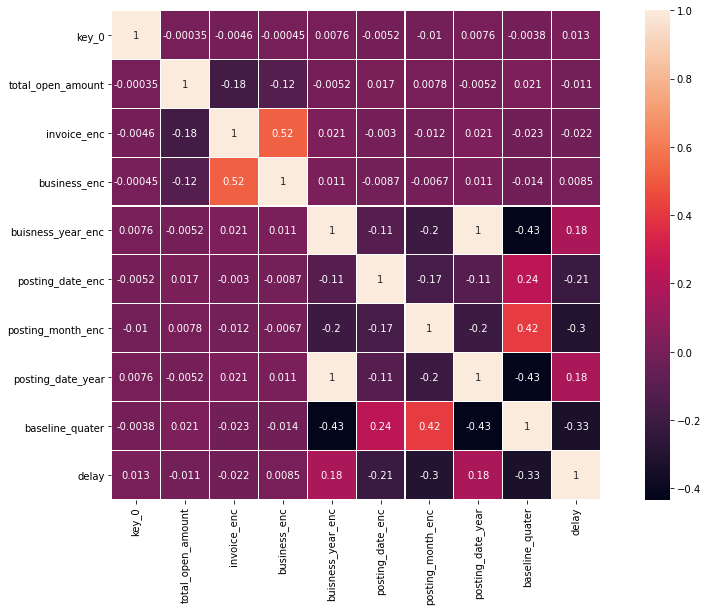

In [62]:
  ##using heatmap for finding relation between "target" and others  
plt.figure(figsize=(16,9))
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)

In [63]:
test=test.drop_duplicates(keep="first")

In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27377 entries, 2106 to 16923
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  27377 non-null  float64
 1   invoice_enc        27377 non-null  int32  
 2   business_enc       27377 non-null  int32  
 3   buisness_year_enc  27377 non-null  int64  
 4   posting_date_enc   27377 non-null  int64  
 5   posting_month_enc  27377 non-null  int64  
 6   posting_date_year  27377 non-null  int64  
 7   baseline_quater    27377 non-null  int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 1.7 MB


In [65]:
X_test=test

In [66]:
X_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,200726979,BJ'S corporation,NaN,2020,1930813533,22-04-20,20200422,20200422,20200507,USD,RV,1,NaN,132.72,20200422,NAA8,1.930814e+09,1
4,U001,200739534,OK systems,NaN,2020,1930782511,13-04-20,20200413,20200413,20200428,USD,RV,1,NaN,25051.77,20200413,NAA8,1.930783e+09,1
7,U001,200769623,WAL-MAR co,NaN,2020,1930729711,02-04-20,20200401,20200402,20200417,USD,RV,1,NaN,19141.79,20200402,NAH4,1.930730e+09,1
10,U001,200744019,TARG associates,NaN,2020,1930764060,09-04-20,20200408,20200409,20200424,USD,RV,1,NaN,2116.88,20200409,NAA8,1.930764e+09,1
29,U001,200782772,ASSOC G co,NaN,2020,1930828600,26-04-20,20200426,20200426,20200511,USD,RV,1,NaN,2094.41,20200426,NAA8,1.930829e+09,1


In [67]:
X_test=X_test.drop_duplicates(keep="first")

Maping all the features of train set to final test set

In [68]:
webframe=X_test

In [69]:

X_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,200726979,BJ'S corporation,NaN,2020,1930813533,22-04-20,20200422,20200422,20200507,USD,RV,1,NaN,132.72,20200422,NAA8,1.930814e+09,1
4,U001,200739534,OK systems,NaN,2020,1930782511,13-04-20,20200413,20200413,20200428,USD,RV,1,NaN,25051.77,20200413,NAA8,1.930783e+09,1
7,U001,200769623,WAL-MAR co,NaN,2020,1930729711,02-04-20,20200401,20200402,20200417,USD,RV,1,NaN,19141.79,20200402,NAH4,1.930730e+09,1
10,U001,200744019,TARG associates,NaN,2020,1930764060,09-04-20,20200408,20200409,20200424,USD,RV,1,NaN,2116.88,20200409,NAA8,1.930764e+09,1
29,U001,200782772,ASSOC G co,NaN,2020,1930828600,26-04-20,20200426,20200426,20200511,USD,RV,1,NaN,2094.41,20200426,NAA8,1.930829e+09,1


In [70]:
  ##deleting all the features that are not there in train set
X_test=X_test.drop(labels="area_business",axis=1)
X_test=X_test.drop(labels="document_create_date.1",axis=1)
X_test=X_test.drop(labels="posting_id",axis=1)

In [71]:
X_test["clear_date"]= X_test["clear_date"].apply(pd.to_datetime)
X_test["due_in_date"] = pd.to_datetime(X_test["due_in_date"], format='%Y%m%d')

In [72]:
  ##making 'target' values
X_test["delay"]=(X_test["clear_date"]-X_test["due_in_date"])

In [73]:
X_test["delay"]=X_test['delay'].dt.days


In [74]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9684 entries, 1 to 49998
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9684 non-null   object        
 1   cust_number           9684 non-null   object        
 2   name_customer         9684 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9684 non-null   int64         
 5   doc_id                9684 non-null   int64         
 6   posting_date          9684 non-null   object        
 7   document_create_date  9684 non-null   int64         
 8   due_in_date           9684 non-null   datetime64[ns]
 9   invoice_currency      9684 non-null   object        
 10  document type         9684 non-null   object        
 11  total_open_amount     9684 non-null   float64       
 12  baseline_create_date  9684 non-null   int64         
 13  cust_payment_term

In [75]:
X_test=X_test.drop(labels="document type",axis=1)
X_test=X_test.drop(labels="isOpen",axis=1)

In [76]:
X_test=X_test.sort_values(by=['posting_date'])

In [77]:
delay_d=X_test['delay'] 
X_test= X_test.drop("delay",axis=1)

In [78]:
X_test['invoice_enc']=invoice_enc.transform(X_test["invoice_currency"])

In [79]:
X_test.drop(['invoice_currency'], axis =1,inplace=True)

In [80]:
  ##Encoding all the features that are required for model building
X_test['business_enc']=business_enc.transform(X_test["business_code"])


In [81]:
X_test.drop(['business_code'], axis =1,inplace=True)

In [82]:
X_test.drop("doc_id", axis =1,inplace=True)

In [83]:
X_test['buisness_year_enc']=business_year_enc.transform(X_test["buisness_year"])

In [84]:
X_test.drop(['buisness_year'], axis =1,inplace=True)

In [85]:
X_test.drop(['name_customer','clear_date',"document_create_date","due_in_date",'cust_payment_terms','invoice_id'], axis =1,inplace=True)

In [86]:
X_test["posting_date"]= X_test["posting_date"].apply(pd.to_datetime)

In [87]:
X_test['posting_date_enc'] = X_test['posting_date'].dt.day
X_test['posting_month_enc'] = X_test['posting_date'].dt.month
X_test['posting_date_year'] = X_test['posting_date'].dt.year

In [88]:
X_test.drop("posting_date", axis =1,inplace=True)

In [89]:
X_test["baseline_create_date"] = pd.to_datetime(X_test["baseline_create_date"], format='%Y%m%d')

In [90]:
X_test['baseline_quater']= pd.to_datetime(X_test['baseline_create_date']).dt.quarter

In [91]:
X_test.drop("baseline_create_date", axis =1,inplace=True)

In [92]:
X_test.drop(['cust_number'], axis =1,inplace=True)

In [93]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9684 entries, 7914 to 39449
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  9684 non-null   float64
 1   invoice_enc        9684 non-null   int32  
 2   business_enc       9684 non-null   int32  
 3   buisness_year_enc  9684 non-null   int64  
 4   posting_date_enc   9684 non-null   int64  
 5   posting_month_enc  9684 non-null   int64  
 6   posting_date_year  9684 non-null   int64  
 7   baseline_quater    9684 non-null   int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 605.2 KB


In [94]:
X_test2=X_test

# Milestone 3

In [95]:
  ##importing of "LinearRegression" model from "sklearn"
from sklearn.linear_model import LinearRegression

In [96]:
  ##making 'object' and train the model on that
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [97]:
 ##prediction done!
y_predict=lr.predict(X_val)

In [98]:
from sklearn.metrics import r2_score

In [99]:
r2_score(y_val,y_predict)

-0.30185991405176305

In [100]:
 ##using "mean_squared_error" for finding the error in prediction
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_val, y_predict, squared=False)
mse

125.8483174694369

# Final model building

In [101]:
 ##importing "DecisionTreeRegressor" from "sklearn" for building another model
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0 , max_depth=5)

Building predictive model

In [102]:
 ##train the new model
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [103]:
 ##pridicting with it
predict2= reg.predict(X_val)

In [104]:
r2_score(y_val,predict2)

0.053191402837377

In [105]:
  ##getting the "mean_squared_error" value
p_mse=mean_squared_error(y_val, predict2, squared=False)
p_mse

107.32388435385366

In [106]:
##"Root_mean_squared_error" value
p_rmse=np.sqrt(p_mse)

In [107]:
p_rmse

10.359724144679417

In [108]:
  ##tree base modeling for the final test data set
final_test_predicts=reg.predict(X_test)

In [109]:
 ##creating delay values by final prediction value
X_test['delay']= final_test_predicts

In [110]:
X_test["delay"]=X_test['delay'].astype(int)

In [111]:
X_test['due_in_date']=test["due_in_date"]

In [112]:
X_test["due_in_date"] = pd.to_datetime(X_test["due_in_date"], format='%Y%m%d')

In [113]:
  ##adding 'due_in_date' and 'delay' for predicting 'clear_date'
X_test['predicted_clear_dates']=X_test["due_in_date"]+pd.to_timedelta(X_test['delay'],unit='d')

In [114]:
X_test['predicted_clear_dates'] = pd.to_datetime(X_test["predicted_clear_dates"], format='%Y%m%d')

In [115]:
X_test.head()

,total_open_amount,invoice_enc,business_enc,buisness_year_enc,posting_date_enc,posting_month_enc,posting_date_year,baseline_quater,delay,due_in_date,predicted_clear_dates
7914,152137.92,1,1,1,3,1,2020,1,55,2020-03-16,2020-05-10
29976,20157.37,1,1,1,3,1,2020,1,55,2020-03-16,2020-05-10
42539,3403.80,1,1,1,3,1,2020,1,55,2020-03-16,2020-05-10
27126,18356.85,1,1,1,3,1,2020,1,55,2020-03-16,2020-05-10
20390,14496.50,1,1,1,3,1,2020,1,55,2020-03-16,2020-05-10


In [116]:
  ##Building function for creating bucket values
def Mapping(x):
    temp = []
    for i in list(x):
        if i < 0:
            temp.append("No delay payment ")
        elif i <= 15:
            temp.append("Minimum delay")
        elif i <= 30:
            temp.append("Medium delay")
        else :
            temp.append("Maximum delay")    
    return temp

# Model data showing with bucket values

In [117]:
bucket_zone = Mapping(X_test["delay"])
bucket = pd.DataFrame()
bucket['Predictions'] = X_test["delay"]
bucket['Bucket_list'] = bucket_zone
bucket['due_in_date']=X_test['due_in_date']
bucket['predicted_payment_dates']=X_test['predicted_clear_dates']
bucket['total_open_amount']=X_test['total_open_amount']

bucket.head()

,Predictions,Bucket_list,due_in_date,predicted_payment_dates,total_open_amount
7914,55,Maximum delay,2020-03-16,2020-05-10,152137.92
29976,55,Maximum delay,2020-03-16,2020-05-10,20157.37
42539,55,Maximum delay,2020-03-16,2020-05-10,3403.80
27126,55,Maximum delay,2020-03-16,2020-05-10,18356.85
20390,55,Maximum delay,2020-03-16,2020-05-10,14496.50


In [118]:
bucket.head(360)

,Predictions,Bucket_list,due_in_date,predicted_payment_dates,total_open_amount
7914,55,Maximum delay,2020-03-16,2020-05-10,152137.92
29976,55,Maximum delay,2020-03-16,2020-05-10,20157.37
42539,55,Maximum delay,2020-03-16,2020-05-10,3403.80
27126,55,Maximum delay,2020-03-16,2020-05-10,18356.85
20390,55,Maximum delay,2020-03-16,2020-05-10,14496.50
...,...,...,...,...,...
13906,9,Minimum delay,2020-05-16,2020-05-25,24129.22
8620,9,Minimum delay,2020-05-16,2020-05-25,20384.39
17357,9,Minimum delay,2020-05-16,2020-05-25,11214.24
8407,9,Minimum delay,2020-05-11,2020-05-20,158949.00


In [119]:
webapp=pd.DataFrame()

In [120]:
webframe.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,200726979,BJ'S corporation,NaN,2020,1930813533,22-04-20,20200422,20200422,20200507,USD,RV,1,NaN,132.72,20200422,NAA8,1.930814e+09,1
4,U001,200739534,OK systems,NaN,2020,1930782511,13-04-20,20200413,20200413,20200428,USD,RV,1,NaN,25051.77,20200413,NAA8,1.930783e+09,1
7,U001,200769623,WAL-MAR co,NaN,2020,1930729711,02-04-20,20200401,20200402,20200417,USD,RV,1,NaN,19141.79,20200402,NAH4,1.930730e+09,1
10,U001,200744019,TARG associates,NaN,2020,1930764060,09-04-20,20200408,20200409,20200424,USD,RV,1,NaN,2116.88,20200409,NAA8,1.930764e+09,1
29,U001,200782772,ASSOC G co,NaN,2020,1930828600,26-04-20,20200426,20200426,20200511,USD,RV,1,NaN,2094.41,20200426,NAA8,1.930829e+09,1


In [121]:
webapp['Customer Name']= webframe['name_customer']

In [122]:
webapp['Customer #']= webframe['cust_number']

In [123]:
webapp['Invoice #']= webframe['invoice_id']

In [124]:
webapp['Invoice Amount']= webframe['total_open_amount']

In [125]:
webapp['Due Date']= bucket['due_in_date']

In [126]:
webapp['Predicted payment Date']= bucket['predicted_payment_dates']

In [127]:
webapp['Notes']=bucket['Bucket_list']

In [128]:
webapp.head()

,Customer Name,Customer #,Invoice #,Invoice Amount,Due Date,Predicted payment Date,Notes
1,BJ'S corporation,200726979,1.930814e+09,132.72,2020-05-07,2020-04-17,No delay payment
4,OK systems,200739534,1.930783e+09,25051.77,2020-04-28,2020-04-25,No delay payment
7,WAL-MAR co,200769623,1.930730e+09,19141.79,2020-04-17,2020-04-26,Minimum delay
10,TARG associates,200744019,1.930764e+09,2116.88,2020-04-24,2020-04-24,Minimum delay
29,ASSOC G co,200782772,1.930829e+09,2094.41,2020-05-11,2020-04-21,No delay payment
